<img src="mall.jpg" alt="image of a mall" title="MALL PHOTO" />

*Segmentation can be seen as simply diviving a dataset into groups of similar observation in such a way that its relevant to marketing. Each segment contains datapoints closely related to each other and different from that of other groups. Segmentation is widely used as a marketing tool to create clusters of clients/customers and adapt relevant strategies for each of them.*

*K-means clustering is an unsupervised machine learning algorithm for clustering ‘n’ observations into ‘k’ clusters where k is predefined or user-defined constant. The main idea is to define k centroids, one for each cluster.*

*In this Kernel we will be exploring, analysing and mining the dataset to understand and uncover the insights hidden in them also we would be using K Means algorithm to segment the customers into various clusters and explore possible marketing strategies and approach.*

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 100)
py.offline.init_notebook_mode(connected = True)
init_notebook_mode(connected = True)
%matplotlib inline
random = 40

In [5]:
# %load plot_vis.py

In [6]:
# loading train data 
df = pd.read_csv("z_ml_data/Mall_Customers.csv", names=["customer_id", "gender", "age", "annual_income", "spending_score"], skiprows = 1)

In [7]:
# displaying first three rows of dataset
df.head(3)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [8]:
# displaying dataset information
df = df.drop(["customer_id"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
gender            200 non-null object
age               200 non-null int64
annual_income     200 non-null int64
spending_score    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [9]:
# displaying summary staticstics of columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,200,NaN,NaN,NaN,38.85,13.969,18,28.75,36,49,70
annual_income,200,NaN,NaN,NaN,60.56,26.2647,15,41.5,61.5,78,137
spending_score,200,NaN,NaN,NaN,50.2,25.8235,1,34.75,50,73,99


> *The above table shows the summary statistics of each column in the dataset from this table we can observe such statistics as the mean, mode, standard deviation, mininum, maximum, 25th and 75th percentile values, also we can see how many unique values are in each column and the number of rows, from the above table we can spot out columns with missing values, variable skewness, unique column, constant colums, columns that wont be of use and also categorical columns.*

In [10]:
# createing male and female dataframe
female = df.loc[df['gender'] == 'Female']
male = df.loc[df['gender'] == 'Male']

>Customer gender is a very important variable to factor in during analysis of especially ecommerce/shopping mall dataset. As such we would be manually creating both cluster namely male and female to get their individual statistics to enable end users strategise for them accordingly.

In [11]:
# displaying summary staticstics of female features
female.describe().T

,count,mean,std,min,25%,50%,75%,max
age,112.0,38.098214,12.644095,18.0,29.00,35.0,47.50,68.0
annual_income,112.0,59.250000,26.011952,16.0,39.75,60.0,77.25,126.0
spending_score,112.0,51.526786,24.114950,5.0,35.00,50.0,73.00,99.0


In [12]:
# displaying summary staticstics of male features
male.describe().T

,count,mean,std,min,25%,50%,75%,max
age,88.0,39.806818,15.514812,18.0,27.75,37.0,50.5,70.0
annual_income,88.0,62.227273,26.638373,15.0,45.50,62.5,78.0,137.0
spending_score,88.0,48.511364,27.896770,1.0,24.50,50.0,70.0,97.0


> *From the above table we can see comparative statistics between the male and female customers, we have 112 females and 88 male customers in our datatset*
- *an important insight to note is that we have the male categories having a higher average/quartile annual income whereas the females have a higher spending score*

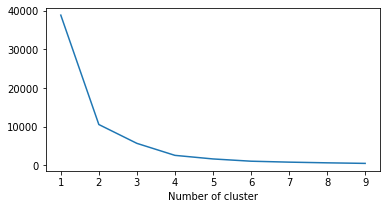

In [13]:
# clustering age 
from sklearn.cluster import KMeans

sse={}
df_age = df[['age']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_age)
    df_age["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
    
plt.figure(figsize=(6, 3))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [14]:
#building 4 clusters for age and adding it to dataframe
kmeans = KMeans(n_clusters=4)
kmeans.fit(df[['age']])
df['age_cluster'] = kmeans.predict(df[['age']])

df_age = order_cluster('age_cluster', 'age',df,False)
#displaying the details of each cluster
df.groupby('age_cluster')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
age_cluster,,,,,,,,
0,47.0,48.340426,3.421648,42.0,46.0,48.0,50.0,55.0
1,50.0,22.600000,3.251373,18.0,20.0,22.5,25.0,28.0
2,74.0,34.229730,3.505562,29.0,31.0,34.0,37.0,41.0
3,29.0,63.275862,4.471310,56.0,59.0,64.0,67.0,70.0


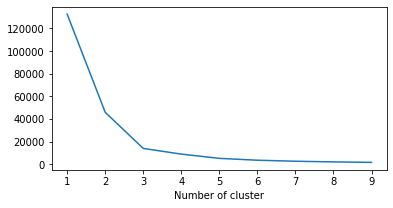

In [15]:
# clustering spending_score 
sse={}
df_spending_score = df[['spending_score']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_spending_score)
    df_spending_score["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
    
plt.figure(figsize=(6, 3))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [16]:
#building 3 clusters for spending_score and adding it to dataframe
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['spending_score']])
df['spending_score_cluster'] = kmeans.predict(df[['spending_score']])

df_spending_score = order_cluster('spending_score_cluster', 'spending_score',df,False)
#displaying the details of each cluster
df.groupby('spending_score_cluster')['spending_score'].describe()

,count,mean,std,min,25%,50%,75%,max
spending_score_cluster,,,,,,,,
0,94.0,48.180851,7.823267,32.0,42.0,48.0,55.0,63.0
1,59.0,81.779661,9.283036,65.0,74.0,81.0,90.0,99.0
2,47.0,14.595745,8.355315,1.0,7.5,14.0,20.0,31.0


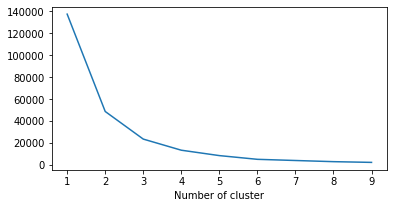

In [17]:
# clustering annual_income 
sse={}
df_annual_income = df[['annual_income']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_annual_income)
    df_annual_income["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
    
plt.figure(figsize=(6, 3))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [18]:
#building 3 clusters for annual_income and adding it to dataframe
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['annual_income']])
df['annual_income_cluster'] = kmeans.predict(df[['annual_income']])

df_annual_income = order_cluster('annual_income_cluster', 'annual_income',df,False)
#displaying the details of each cluster
df.groupby('annual_income_cluster')['annual_income'].describe()

,count,mean,std,min,25%,50%,75%,max
annual_income_cluster,,,,,,,,
0,74.0,33.486486,11.283693,15.0,23.0,34.0,43.0,50.0
1,36.0,99.888889,14.950925,85.0,87.0,97.5,103.0,137.0
2,90.0,67.088889,8.479512,54.0,60.0,67.0,75.0,81.0


In [19]:
# renaming cluster values
df['age_cluster'] = df['age_cluster'].replace({0:'Young', 2:'Senior', 3:'Adult', 1: 'Old'})
df['spending_score_cluster'] = df['spending_score_cluster'].replace({1:'Low', 0:'Medium', 2:'High'})
df['annual_income_cluster'] = df['annual_income_cluster'].replace({1:'Low', 2:'Medium', 0:'High'})
df.head()

,gender,age,annual_income,spending_score,age_cluster,spending_score_cluster,annual_income_cluster
0,Male,19,15,39,Old,Medium,High
1,Male,21,15,81,Old,Low,High
2,Female,20,16,6,Old,High,High
3,Female,23,16,77,Old,Low,High
4,Female,31,17,40,Senior,Medium,High


> *We introduced 3 new columns using K-means algorithm to cluster customers into different bin. The age column was clustered to young(18-28), adult(29-41), senior(42-55) and old(56-70) customers, the same techniques was applied to annual income and spending score. This was done to enable us better analyse the dataset and uncover the relationships and patterns between them.*

> *we could have easily segmented them manually but k-means was used instead because using such technique we can identify and select the optimal number of segments with respect to the given dataset.*

## Exploratory Data Analysis

*In this section we are going to be visually exploring and analyzing the dataset to display possible relationships and aggregate summaries.* Although we explored the entire dataset, it is often preferable to further explore the dataset individually for the male and female segments.

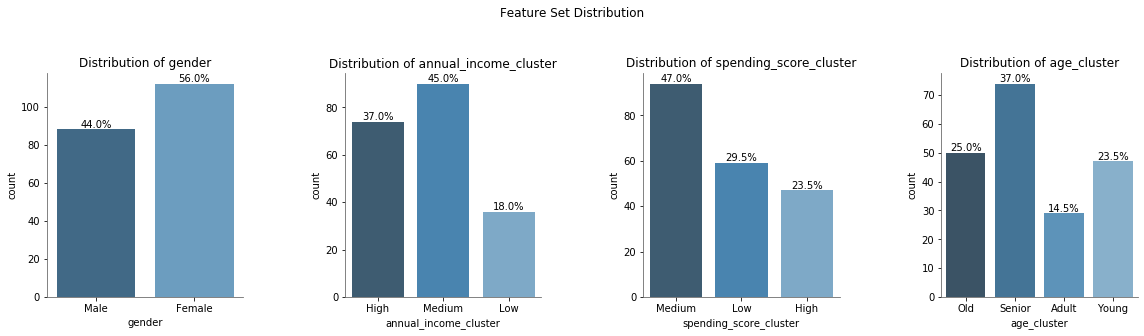

In [20]:
# displaying total orders the disribution of each of the dependent(categorical) columns
plt.figure(1 , figsize = (16, 4.2))
n = 0 
for x in ['gender' , 'annual_income_cluster', 'spending_score_cluster', 'age_cluster']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 1.3)
    ax = count_plot(feature=x, df=df)
    plt.title('Distribution of {}'.format(x))
plt.suptitle('Feature Set Distribution', y=1.1)
plt.show()

> *The above plots displays the percentage count of each variable in the feature. as seen in last plot above the age segment is made up of 25%(young), 23.5%(adults), 37%(senior), 14.5%(old)*

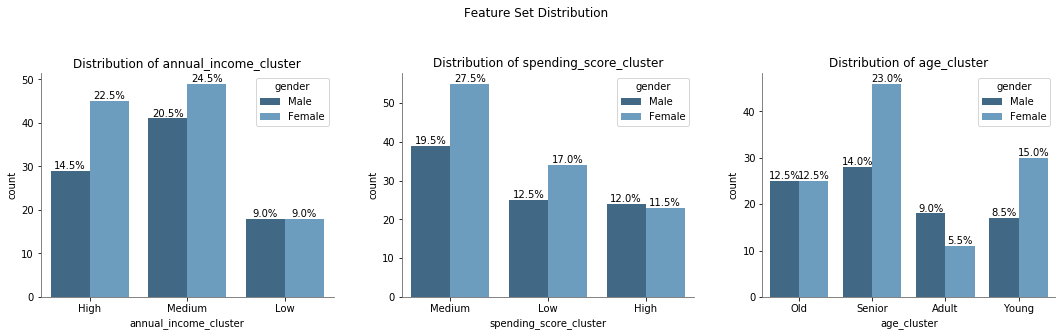

In [21]:
# displaying total orders the disribution of each of the dependent(categorical) columns
plt.figure(1 , figsize = (15, 4.2))
n = 0 
for x in ['annual_income_cluster', 'spending_score_cluster', 'age_cluster']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 1.3)
    ax = count_plot(feature=x, df=df, hue='gender')
    plt.title('Distribution of {}'.format(x))
plt.suptitle('Feature Set Distribution', y=1.1)
plt.show()

> *The above plots displays the percentage count of each variable in the feature set but with respect to gender. as seen in last plot above, of the 25% young customers 12.5% are males and 12.5% are females, out of the 23.5% adults 8.5% are males and 15% females, out of the 37% senior 14% are males and 23% are females and finally of the 14.5% old customers, 9% are males and 9% are females*

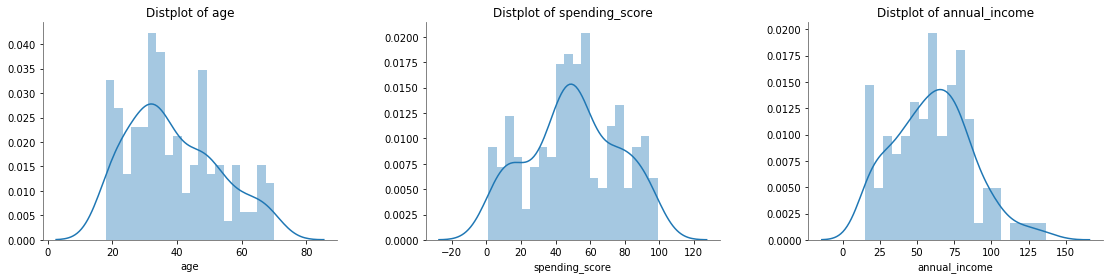

In [22]:
# univariate feature distribution
plt.figure(1 , figsize = (19, 4))
n = 0 
for x in ['age' , 'spending_score', 'annual_income']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.3)
    ax =sns.distplot(df[x] , bins = 20, label='female')
    plt.title('Distplot of {}'.format(x))
    format_spines(ax, right_border=False)
plt.show()

> *The above plots displays the individual distriibutions of the categorical columns, as seen in the plots majority of customers earn between 50 to 80*

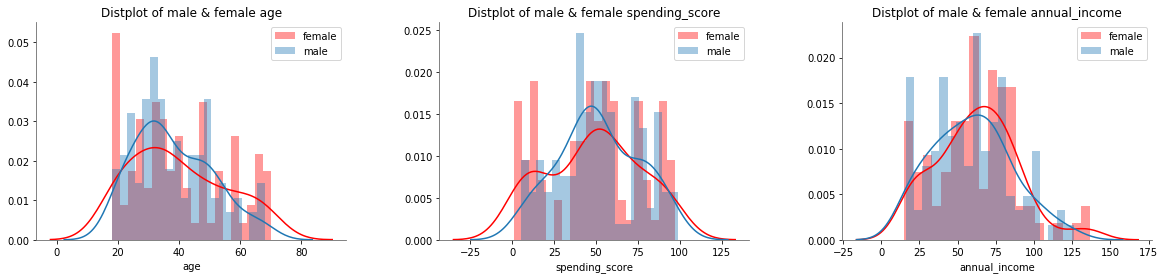

In [23]:
# univariate feature distribution
plt.figure(1 , figsize = (20, 4))
n = 0 
for x in ['age' , 'spending_score', 'annual_income']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.3)
    ax = sns.distplot(male[x] , bins = 20, label='female', color='r')
    ax = sns.distplot(female[x] , bins = 20, label='male')
    plt.title('Distplot of male & female {}'.format(x))
    plt.legend()
    format_spines(ax, right_border=False)
plt.show()

> *The above plots displays the individual distributions of the categorical columns with respect to their gender, from the annual income plot it is see then most of the males earn between 50-90 wheras majority of the females earn between 30-75. Also it is seen that very little peopl earm over 100 usd*.

Multi Variate

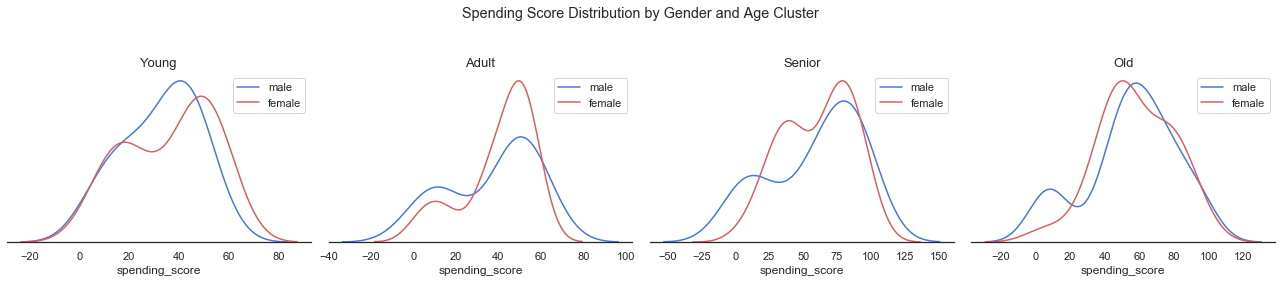

In [24]:
# Configuration
sns.set(style='white', palette='muted', color_codes=True)
fig, axs = plt.subplots(1, 4, figsize=(18, 4))
sns.despine(left=True)

# Dataframe indexing
young = df.loc[df['age_cluster'] == 'Young']
adult = df.loc[df['age_cluster'] == 'Adult']
senior = df.loc[df['age_cluster'] == 'Senior']
old = df.loc[df['age_cluster'] == 'Old']

titles = ['Young', 'Adult', 'Senior', 'Old']
age_range_dataframes = [young, adult, senior, old]

for idx in range(4):
    age_range = age_range_dataframes[idx]
    axs[idx] = sns.distplot(age_range[age_range['gender']=='Male']['spending_score'], 
                          bins=20, ax=axs[idx], label='male', color='b', hist=False)
    axs[idx] = sns.distplot(age_range[age_range['gender']=='Female']['spending_score'], 
                          bins=20, ax=axs[idx], label='female', color='r', hist=False)
    axs[idx].set_title(titles[idx], size=13)

fig.suptitle('Spending Score Distribution by Gender and Age Cluster')
plt.setp(axs, yticks=[])
plt.tight_layout()
plt.subplots_adjust(top=0.75)
plt.show()

> *In the above plots we try to visualize the relationship between the various age clusters and their spending score with respect to their gender.*
- *it is seen that that the older and senior females have a higher spending score than the male counter parts but for some reason the younger males happen to have a slightly higher spending score than their female counterparts while there is an almost equal proportion between the young males and females*

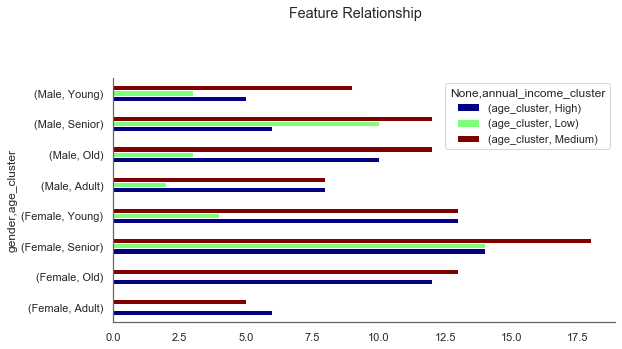

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4.5))
df.groupby(['gender', 'age_cluster', 'annual_income_cluster'])[['age_cluster']].count().unstack().plot.barh(ax=ax, cmap='jet')
format_spines(ax, right_border=False)
plt.suptitle('Feature Relationship', y=1.1)
plt.show()

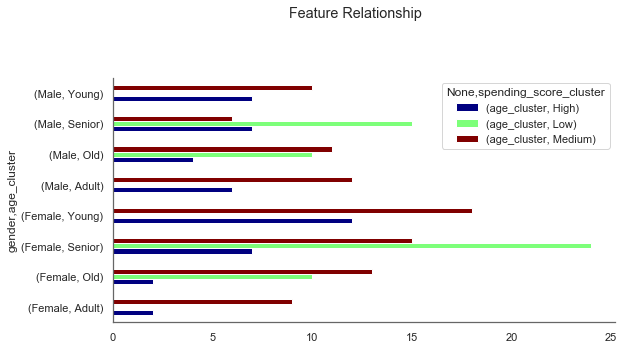

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4.5))
df.groupby(['gender', 'age_cluster', 'spending_score_cluster'])[['age_cluster']].count().unstack().plot.barh(ax=ax, cmap='jet')
format_spines(ax, right_border=False)
plt.suptitle('Feature Relationship', y=1.1)
plt.show()

> *The above plot and that before takes things a little further by showing the multi-variate relationship between the features simultaneously.*
*as seen above the plot shows the relationship between the individual male and female young, senior, old and adult customers and their spending score clusters.
- *it is easily seen that there are 7 senior females with high spending score, 15 senior females with medium spending score and 24 senior females with low spending score* 
- *The adult females on the other hand haven12 customers on with high spending score, 18 customers with medium spending score and no customer with low spending score cluster.*

In [27]:
# displaying first five rows of dataset
df.head()

,gender,age,annual_income,spending_score,age_cluster,spending_score_cluster,annual_income_cluster
0,Male,19,15,39,Old,Medium,High
1,Male,21,15,81,Old,Low,High
2,Female,20,16,6,Old,High,High
3,Female,23,16,77,Old,Low,High
4,Female,31,17,40,Senior,Medium,High


> *K-means clustering is an unsupervised machine learning algorithm for clustering ‘n’ observations into ‘k’ clusters where k is predefined or user-defined constant. The main idea is to define k centroids, one for each cluster.*
- *The K-Means algorithm involves:
Choosing the number of clusters "k". for this process we would use the elbow method to determine the optimal number of K*
- *Randomly assign each point to a cluster*
- *Until clusters stop changing, repeat the following:*
 - *For each cluster, compute the cluster centroid by taking the mean vector of points in the cluster.*
 - *Assign each data point to the cluster for which the centroid is the closest.*

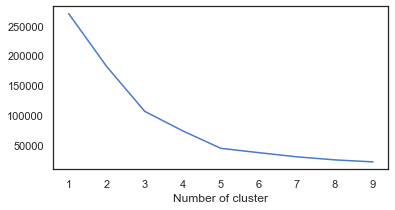

In [28]:
# Annual income against spending score
sse={}
ai_ss = df[['spending_score', 'annual_income']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(ai_ss)
    ai_ss["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
    
plt.figure(figsize=(6, 3))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [29]:
#building 5 clusters for recency and adding it to dataframe
ai_ssc = df[['spending_score', 'annual_income']]
k_means = KMeans(n_clusters=5, random_state=12)
k_means.fit(ai_ssc)
ai_ssc_kmeans = k_means.predict(ai_ssc)
center = k_means.cluster_centers_

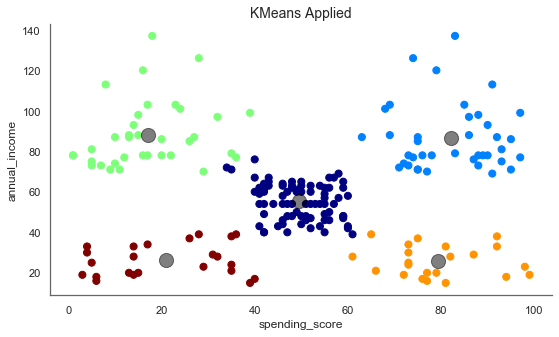

In [30]:
df['income_spend_cluster'] = ai_ssc_kmeans
plot_kmeans(ai_ssc, ai_ssc_kmeans, center)

> From th elbow curve, 5 happens to be the optimal number of clusters when considering annual income and spending score.
> - Brown cluster: this customer segment can be described as low-income low-spenders, it contains low earning customers with low spending score.
- Orange cluster: this customer segment can be described as low-income high-spenders, it contains low earning customers with high spending score.
- Dark blue cluster: this customer segment can be described as Average-income average-spenders, it contains low customers earning an average amount of income and also average amount of spending.
- Green cluster: this customer segment can be described as High-income low-spenders, it contains high earning customers with low spending score.
- Light blue cluster: this customer segment can be described as High-income low-spenders, it contains high earning customers with high spending score.
>
> It is the goal of every business to have majority of customers in either the light-blue or orange clusters, but at the same time it is also very important that they are able to keep them there.

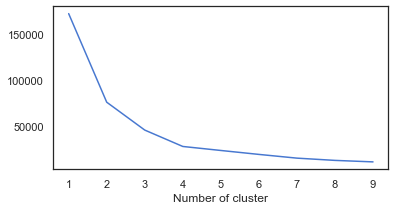

In [31]:
# Annual income against spending score
sse={}
ag_ss = df[['age', 'spending_score']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(ag_ss)
    ag_ss["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
    
plt.figure(figsize=(6, 3))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [32]:
#building 5 clusters for recency and adding it to dataframe
ag_ssc = df[['spending_score', 'age']]
k_means = KMeans(n_clusters=4, random_state=12)
k_means.fit(ag_ssc)
ag_ssc_kmeans = k_means.predict(ag_ssc)
center = k_means.cluster_centers_

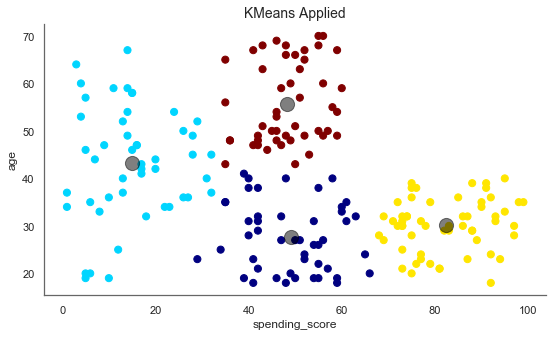

In [33]:
df['age_spend_cluster'] = ag_ssc_kmeans
plot_kmeans(ag_ssc, ag_ssc_kmeans, center)

> From th elbow curve, 4 happens to be the optimal number of clusters when considering annual age and spending score.
> - Light blue cluster: this customer segment can be described as low-spenders, it contains both young, adult and old customers with low spending score.
- Brown cluster: this customer segment can be described as older average-spenders, it contains adult and old customers with an average amount of spending.
- Dark blue cluster: this customer segment can be described as younger average-spenders, it contains young and adult customers with an average amount of spending.
- Yellow cluster: this customer segment can be described as low-income high-spenders, it contains low earning customers with high spending score.
>
>Having a better understanding of the customers segments, a company could make better and more informed decisions. An example, there are customers with high annual income but low spending score. A more strategic and targeted marketing approach could lift their interest and make them become higher spenders. The focus should also be on the "loyal" customers and maintain their satisfaction.

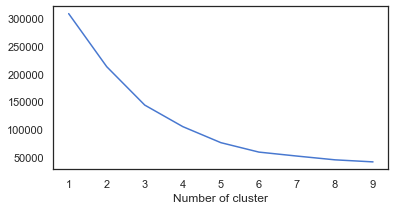

In [34]:
# Annual income against spending score
sse={}
ag_ss_ai = df[['age', 'spending_score','annual_income']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(ag_ss_ai)
    ag_ss["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
    
plt.figure(figsize=(6, 3))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [35]:
# Annual income against spending score against age
ag_ss_aic = df[['age', 'spending_score','annual_income']]
k_means = KMeans(n_clusters=5, random_state=12)
k_means.fit(ag_ss_aic)
ag_ss_aic_kmeans = k_means.predict(ag_ss_aic)
center = k_means.cluster_centers_
labels = k_means.labels_

In [36]:
df['age_spend_income_cluster'] = ag_ss_aic_kmeans

In [37]:
ag_ss_aic['labels'] =  labels

trace1 = go.Scatter3d(
    x= ag_ss_aic['age'],
    y= ag_ss_aic['spending_score'],
    z= ag_ss_aic['annual_income'],
    mode='markers',
     marker=dict(
        color = ag_ss_aic['labels'], 
        size= 10,
        line=dict(
            color= ag_ss_aic['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

> The above plot shows the three dimensional view when  annual age and spending score, and age.

We have thus seen, how we could arrive at meaningful insights and recommendations by using clustering algorithms to generate customer segments. For the sake of simplicity, the dataset used only 3 variables — income, spending score and age. In a typical business scenario, there could be several variables which could possibly generate much more realistic and business-specific insights.

This rational behind this kernel is to show the power of analytics even on the smallest amount of data and variables. 